## 数据生成 data generation

模拟生成直线附近的点

Simulate generating points near a straight line

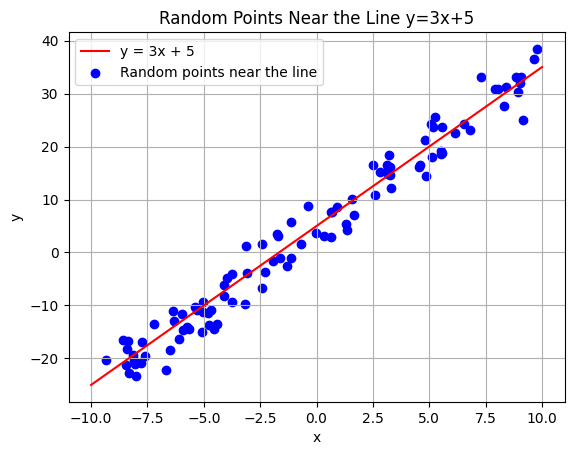

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机的x值 (Generate random x values)
x_values = np.random.uniform(-10, 10, 100)

# 计算直线上的y值 y = 3x + 5 (Calculate y values on the line y=3x+5)
y_values = 3 * x_values + 5

# 添加随机噪声，使点分布在直线附近 (Add random noise to make the points distributed around the line)
noise = np.random.normal(0, 3, 100)  # 均值为0，标准差为3的噪声 (Noise with mean 0 and standard deviation 3)
y_random = y_values + noise

# 绘制直线 y = 3x + 5 (Plot the line y = 3x + 5)
x_line = np.linspace(-10, 10, 100)
y_line = 3 * x_line + 5
plt.plot(x_line, y_line, color='red', label='y = 3x + 5')

# 绘制随机点 (Plot the random points)
plt.scatter(x_values, y_random, color='blue', label='Random points near the line')

# 添加图例和标签 (Add legend and labels)
plt.legend()
plt.title('Random Points Near the Line y=3x+5')  # 图形标题 (Plot title)
plt.xlabel('x')  # x轴标签 (x-axis label)
plt.ylabel('y')  # y轴标签 (y-axis label)

# 显示图形 (Show the plot)
plt.grid(True)
plt.show()

## 最小二乘法 least squares method

使用最小二乘法，求解线性回归系数和截距，数据集和标签是x_values和y_random

Use the least squares method to solve for the coefficients and intercept of linear regression, where the dataset and labels are x_values and y_random.

拟合得到的斜率 (Slope): 3.0334366775376806
拟合得到的截距 (Intercept): 4.641946978011626


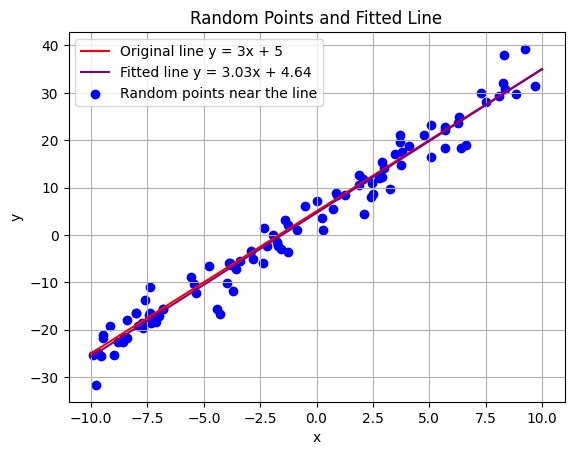

In [2]:
# 使用最小二乘法拟合直线 (Use least squares method to fit the line)
# np.polyfit(x_values, y_random, 1) 返回的结果是斜率和截距 (np.polyfit returns slope and intercept)
slope, intercept = np.polyfit(x_values, y_random, 1)

print(f"拟合得到的斜率 (Slope): {slope}")
print(f"拟合得到的截距 (Intercept): {intercept}")

# 绘制原始直线 y = 3x + 5 (Plot the original line y=3x+5)
x_line = np.linspace(-10, 10, 100)
y_line = 3 * x_line + 5
plt.plot(x_line, y_line, color='red', label='Original line y = 3x + 5')

# 绘制拟合的直线 (Plot the fitted line)
y_fitted = slope * x_line + intercept
plt.plot(x_line, y_fitted, color='purple', label=f'Fitted line y = {slope:.2f}x + {intercept:.2f}')

# 绘制随机点 (Plot the random points)
plt.scatter(x_values, y_random, color='blue', label='Random points near the line')

# 添加图例和标签 (Add legend and labels)
plt.legend()
plt.title('Random Points and Fitted Line')
plt.xlabel('x')
plt.ylabel('y')

# 显示图形 (Show the plot)
plt.grid(True)
plt.show()

模拟元线性回归数据

simulate multiple linear regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成多元线性回归数据
# Generate data for multiple linear regression
x1_values = np.random.uniform(-10, 10, 100)
x2_values = np.random.uniform(-10, 10, 100)
y_values = 3 * x1_values + 6 * x2_values + 5

# 添加噪声 (均值为0，标准差为3)
# Add noise (mean 0, standard deviation 3)
noise = np.random.normal(0, 3, 100)
y_random = y_values + noise

# 将 x1 和 x2 组合成一个矩阵
# Combine x1 and x2 into a matrix
X = np.vstack([x1_values, x2_values, np.ones(len(x1_values))]).T

# 使用最小二乘法进行线性回归
# Perform linear regression using the least squares method
coeffs, residuals, rank, s = np.linalg.lstsq(X, y_random, rcond=None)

# 输出拟合的结果
# Output the fitting results
print(f"拟合得到的系数 (Coefficients): {coeffs[:-1]}")
print(f"拟合得到的截距 (Intercept): {coeffs[-1]}")

拟合得到的系数 (Coefficients): [2.98330045 6.08645556]
拟合得到的截距 (Intercept): 4.349237099033635


In [8]:
from sklearn.linear_model import LinearRegression

# 使用最小二乘法拟合线性回归模型 (Fit linear regression using least squares)
lin_regressor = LinearRegression()
lin_regressor.fit(x_values, y_random)

# 获取拟合的斜率和截距 (Get fitted slope and intercept)
w_lin = lin_regressor.coef_[0][0]
b_lin = lin_regressor.intercept_[0]

print(f"最小二乘法拟合得到的斜率 (Slope from least squares): {w_lin}")
print(f"最小二乘法拟合得到的截距 (Intercept from least squares): {b_lin}")

最小二乘法拟合得到的斜率 (Slope from least squares): 3.0763177663582892
最小二乘法拟合得到的截距 (Intercept from least squares): 4.426518943469186


## 梯度下降法 Gradient descent

使用梯度下降法，求解线性回归系数和截距，数据集和标签是x_values和y_random

Use the gradient descent method to solve for the coefficients and intercept of linear regression, where the dataset and labels are x_values and y_random.

拟合得到的斜率 (Slope from SGD): 2.924204276794707
拟合得到的截距 (Intercept from SGD): 5.135093424206454


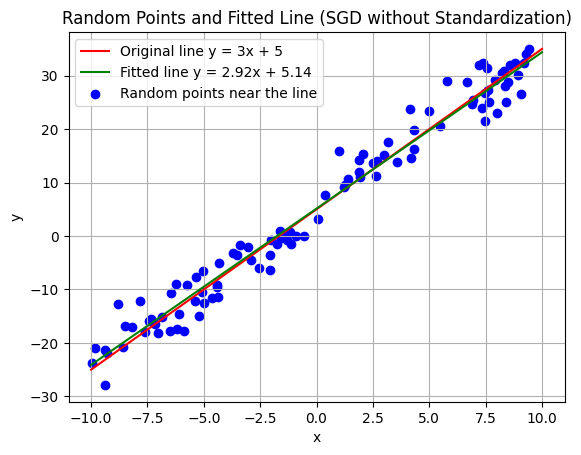

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# 生成随机的x值 (Generate random x values)
x_values = np.random.uniform(-10, 10, 100)

# 计算直线上的y值 y = 3x + 5 (Calculate y values on the line y=3x+5)
y_values = 3 * x_values + 5

# 添加随机噪声，使点分布在直线附近 (Add random noise to make the points distributed around the line)
noise = np.random.normal(0, 3, 100)  # 均值为0，标准差为3的噪声 (Noise with mean 0 and standard deviation 3)
y_random = y_values + noise

# 将数据转换为合适的形状 (Reshape the data)
x_values = x_values.reshape(-1, 1)
y_random = y_random.reshape(-1, 1)

# 使用随机梯度下降的线性回归模型 (Use Stochastic Gradient Descent for linear regression)
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01)  # eta0 是学习率 (eta0 is the learning rate)
sgd_regressor.fit(x_values, y_random.ravel())  # 拟合模型 (Fit the model)

# 获取斜率和截距 (Get the fitted slope and intercept)
w_sgd = sgd_regressor.coef_[0]
b_sgd = sgd_regressor.intercept_[0]

print(f"拟合得到的斜率 (Slope from SGD): {w_sgd}")
print(f"拟合得到的截距 (Intercept from SGD): {b_sgd}")

# 绘制原始直线 y = 3x + 5 (Plot the original line y=3x+5)
x_line = np.linspace(-10, 10, 100).reshape(-1, 1)
y_line = 3 * x_line + 5
plt.plot(x_line, y_line, color='red', label='Original line y = 3x + 5')

# 使用拟合的斜率和截距绘制拟合直线 (Plot fitted line using slope and intercept)
y_fitted = w_sgd * x_line + b_sgd
plt.plot(x_line, y_fitted, color='green', label=f'Fitted line y = {w_sgd:.2f}x + {b_sgd:.2f}')

# 绘制随机点 (Plot the random points)
plt.scatter(x_values, y_random, color='blue', label='Random points near the line')

# 添加图例和标签 (Add legend and labels)
plt.legend()
plt.title('Random Points and Fitted Line (SGD without Standardization)')
plt.xlabel('x')
plt.ylabel('y')

# 显示图形 (Show the plot)
plt.grid(True)
plt.show()

标准化后的斜率 (Slope from standardized data): 16.702932836032804
标准化后的截距 (Intercept from standardized data): 5.2890274317318955
还原后的斜率 (Restored original slope): 3.0039537952098208
还原后的截距 (Restored original intercept): 5.065205232785909


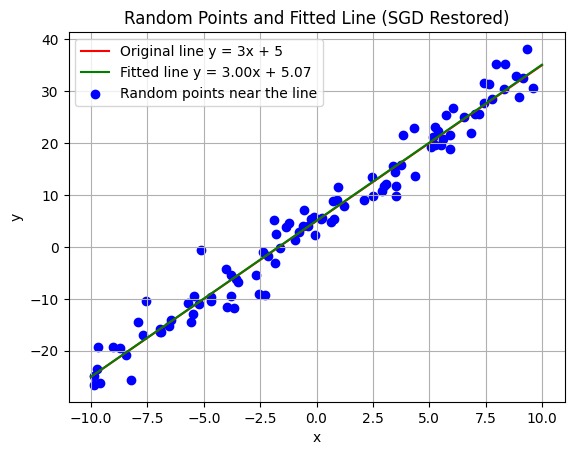

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# 生成随机的x值 (Generate random x values)
x_values = np.random.uniform(-10, 10, 100)

# 计算直线上的y值 y = 3x + 5 (Calculate y values on the line y=3x+5)
y_values = 3 * x_values + 5

# 添加随机噪声，使点分布在直线附近 (Add random noise to make the points distributed around the line)
noise = np.random.normal(0, 3, 100)  # 均值为0，标准差为3的噪声 (Noise with mean 0 and standard deviation 3)
y_random = y_values + noise

# 将数据转换为合适的形状 (Reshape the data)
x_values = x_values.reshape(-1, 1)
y_random = y_random.reshape(-1, 1)

# 数据标准化 (Standardize the data)
scaler = StandardScaler()
x_values_scaled = scaler.fit_transform(x_values)

# 使用随机梯度下降的线性回归模型 (Use Stochastic Gradient Descent for linear regression)
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01)
sgd_regressor.fit(x_values_scaled, y_random.ravel())

# 获取标准化后的斜率和截距 (Get the slope and intercept from standardized data)
w_sgd_scaled = sgd_regressor.coef_[0]
b_sgd_scaled = sgd_regressor.intercept_[0]

# 还原到原始尺度 (Convert coefficients back to original scale)
w_sgd_original = w_sgd_scaled / scaler.scale_[0]  # 恢复原始斜率 (Restore original slope)
b_sgd_original = b_sgd_scaled - (w_sgd_scaled * scaler.mean_[0] / scaler.scale_[0])  # 恢复原始截距 (Restore original intercept)

print(f"标准化后的斜率 (Slope from standardized data): {w_sgd_scaled}")
print(f"标准化后的截距 (Intercept from standardized data): {b_sgd_scaled}")
print(f"还原后的斜率 (Restored original slope): {w_sgd_original}")
print(f"还原后的截距 (Restored original intercept): {b_sgd_original}")

# 绘制原始直线 y = 3x + 5 (Plot the original line y=3x+5)
x_line = np.linspace(-10, 10, 100).reshape(-1, 1)
y_line = 3 * x_line + 5
plt.plot(x_line, y_line, color='red', label='Original line y = 3x + 5')

# 使用还原的斜率和截距绘制拟合直线 (Plot fitted line using restored slope and intercept)
y_fitted = w_sgd_original * x_line + b_sgd_original
plt.plot(x_line, y_fitted, color='green', label=f'Fitted line y = {w_sgd_original:.2f}x + {b_sgd_original:.2f}')

# 绘制随机点 (Plot the random points)
plt.scatter(x_values, y_random, color='blue', label='Random points near the line')

# 添加图例和标签 (Add legend and labels)
plt.legend()
plt.title('Random Points and Fitted Line (SGD Restored)')
plt.xlabel('x')
plt.ylabel('y')

# 显示图形 (Show the plot)
plt.grid(True)
plt.show()